### 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2. Descriptive Statistics

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3. Missing Values Analysis

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 4. Missing Values Treatment

In [6]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

### 5. Outlier Analysis

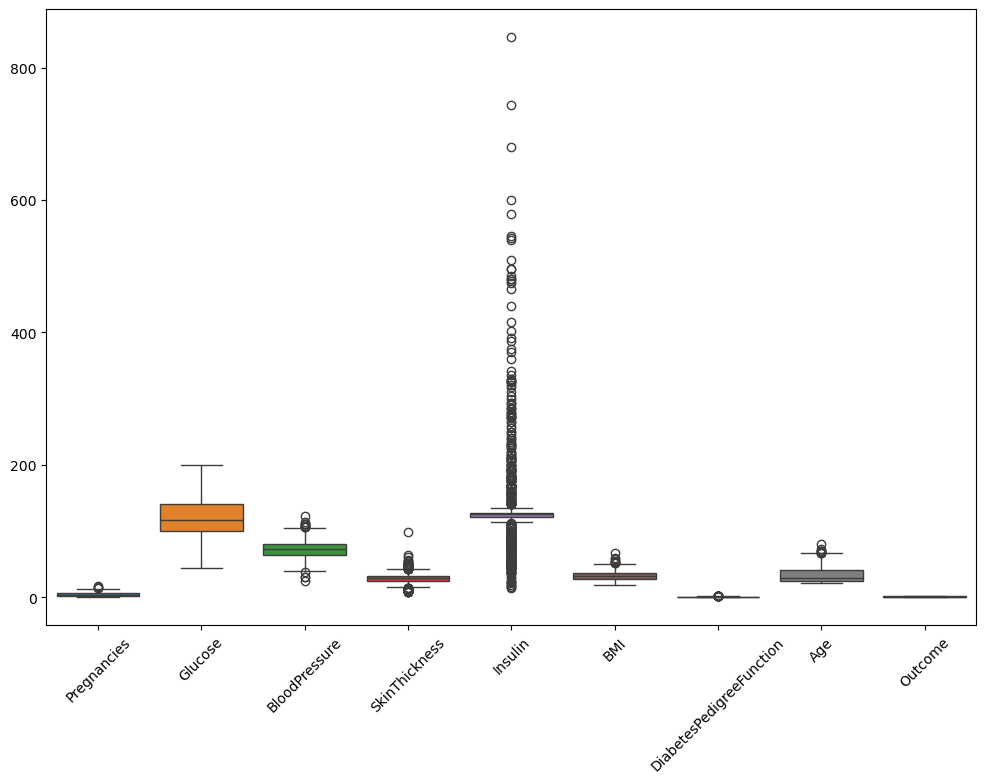

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### Insights

Insulin → heavy right skew, extreme outliers

BMI → moderate outliers

DiabetesPedigreeFunction → right-skewed

### 6. Outlier Treatment (IQR Method)

In [8]:
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(df[col], lower, upper)

for col in ["Insulin", "BMI", "DiabetesPedigreeFunction"]:
    df[col] = remove_outliers(col)

### 7. Exploratory Data Analysis (EDA)

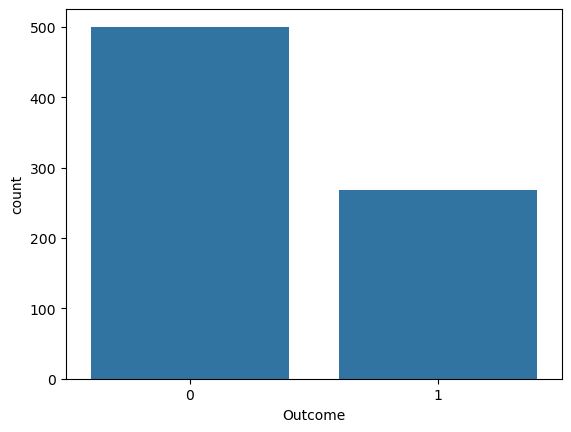

In [9]:
# Outcome Distribution

sns.countplot(x="Outcome", data=df)
plt.show()

### Insights

Dataset is slightly imbalanced

More non-diabetic (0) than diabetic (1)

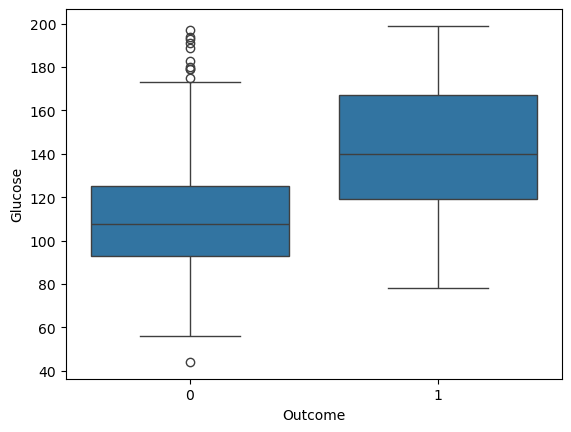

In [10]:
# Glucose vs Outcome

sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.show()


### Insights

Diabetic patients have significantly higher glucose levels

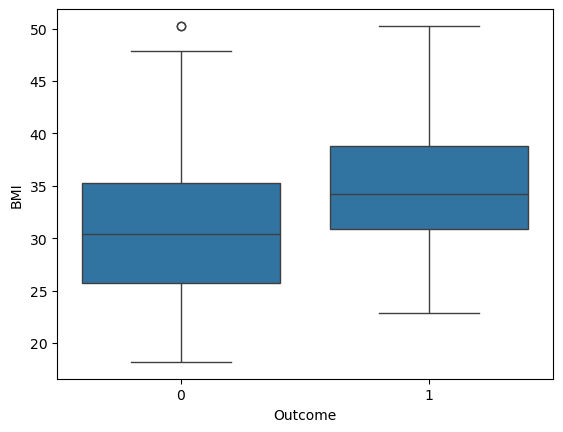

In [11]:
# BMI vs Outcome

sns.boxplot(x="Outcome", y="BMI", data=df)
plt.show()

### Insights

Higher BMI is associated with diabetes

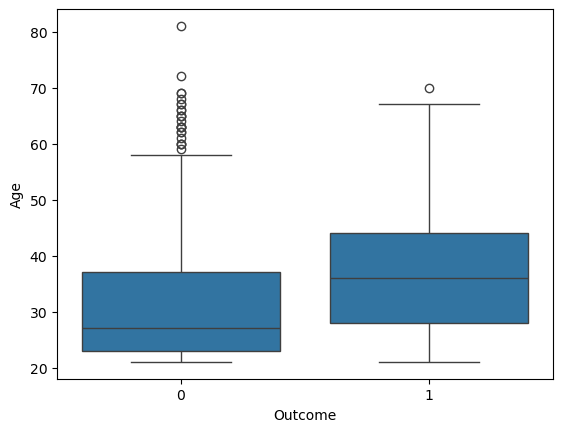

In [12]:
# Age vs Outcome

sns.boxplot(x="Outcome", y="Age", data=df)
plt.show()

### Insights

Diabetes prevalence increases with age

### 8. Correlation Analysis

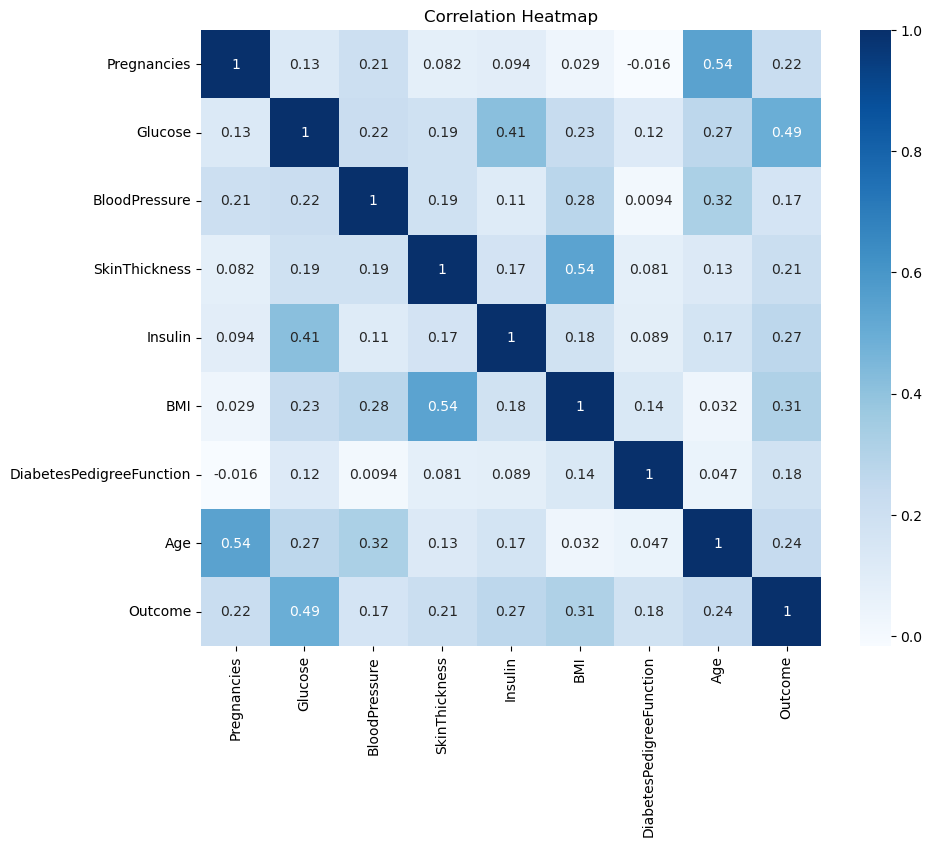

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

### Insights

Glucose is the strongest predictor of diabetes

BMI and Age significantly increase diabetes risk

Pregnancies correlate positively with diabetes

Raw dataset contained hidden missing values (zeros)

Median imputation and outlier treatment improved data quality

Dataset is suitable for classification models (Logistic Regression, Random Forest, XGBoost)

Blood Pressure (BP) - min. 90/60, max. 180/120

Glucose (Fasting / Random) - min. 126 mg/dL, max. 300 mg/dL

Skin Thickness - min. 5 mm, max. 50 mm

Insulin - min. 0 uU/ml, max. 900 uU/ml

BMI - min. 18.5 kg/m2, max. 70 kg/m2

Diabetes Pedigree Function - min. 0.08, max. 2.5

In [14]:
df['Age' ].groupby (df['Outcome' ]) .mean()

Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Outcome'>

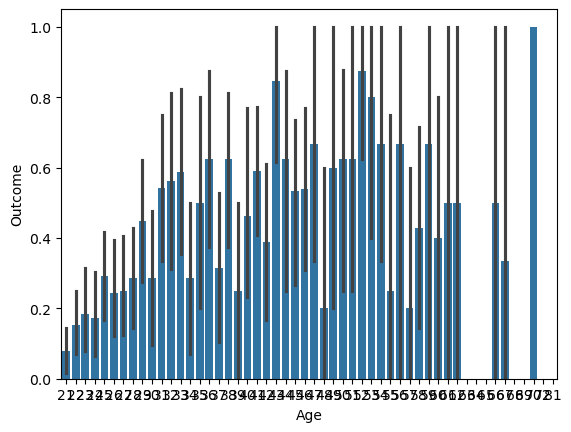

In [15]:
sns.barplot(x=df['Age'],y=df['Outcome'],estimator='mean')

<Axes: xlabel='Age'>

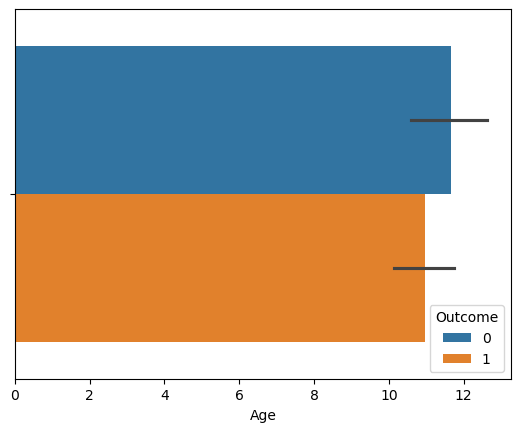

In [16]:
sns.barplot(x=df['Age' ],hue=df['Outcome' ], estimator='std')

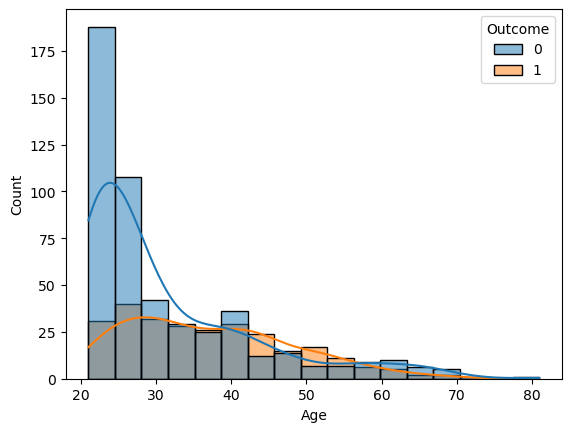

In [17]:
sns.histplot(x='Age',hue='Outcome',data=df,kde=True)
plt.show()

In [18]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
df['BMI' ].groupby (df['Outcome' ]) .mean()

Outcome
0    30.867400
1    35.240299
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Outcome'>

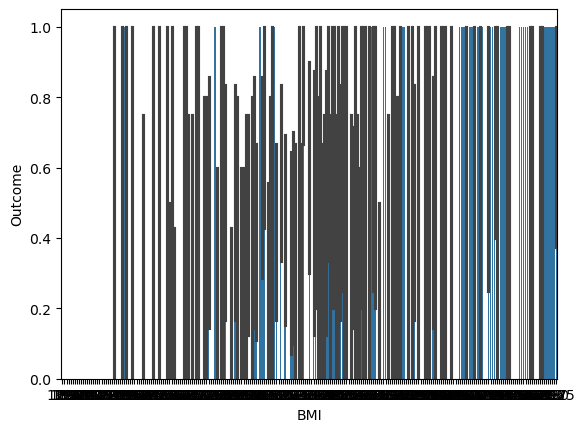

In [20]:
sns.barplot(x=df['BMI'],y=df['Outcome'],estimator='mean')

<Axes: xlabel='BMI'>

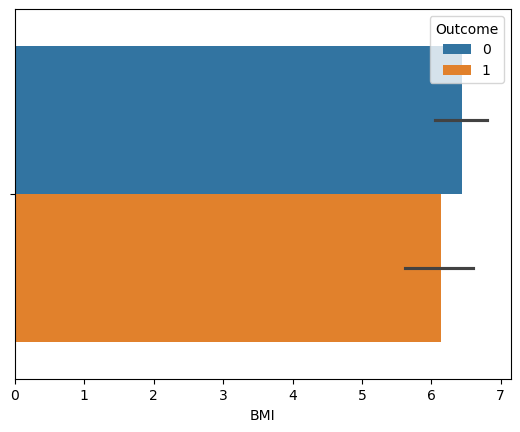

In [ ]:
sns.barplot(x=df['BMI' ],hue=df['Outcome'], estimator='std')

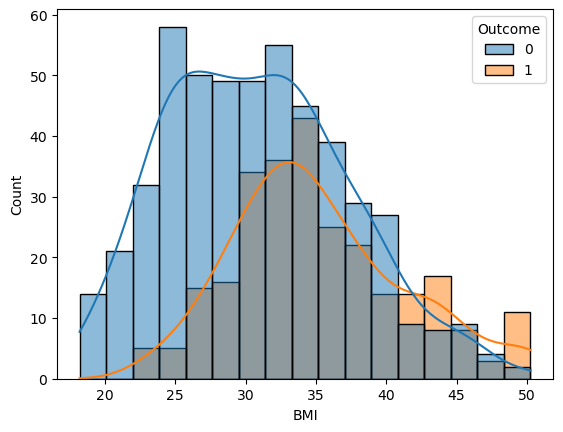

In [22]:
sns.histplot(x='BMI',hue='Outcome',data=df,kde=True)
plt.show()

In [38]:
cols = ["Age","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction"]
for col in cols:
  die_age=df[col][df['Outcome'] == 1]
  nondie_age=df[col][df['Outcome'] == 0]

  # H0 : Both data are same
  # H1 : Both are not same
  from scipy.stats import ttest_ind

  stat, p = ttest_ind(die_age, nondie_age)

  alpha = 0.05
  if p<alpha:
    print(col,' : Reject H0')
  else:
    print(col,' : Accept H0')

Age  : Reject H0
Glucose  : Reject H0
BloodPressure  : Reject H0
SkinThickness  : Reject H0
Insulin  : Reject H0
BMI  : Reject H0
DiabetesPedigreeFunction  : Reject H0


Rejecting H0 --> significantly differ from eachother, and this particular column effect the outcome column

Age is dissimilar , Age of the person effect the outcome

Glucose is dissimilar , Glucose of the person effect the outcome

BloodPressure is dissimilar , BloodPressure of the person effect the outcome

SkinThickness is dissimilar , SkinThickness of the person effect the outcome

Insulin is dissimilar , Insulin of the person effect the outcome

BMI is dissimilar , BMI of the person effect the outcome

DiabetesPedigreeFunction is dissimilar , DiabetesPedigreeFunction of the person effect the outcome

In [37]:
cols = ["Age","BMI","Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction"]


In [28]:
# Mean of each feature grouped by Outcome

for col in cols:
    print(f"\nMean of {col} by Outcome")
    print(df.groupby("Outcome")[col].mean())



Mean of Age by Outcome
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64

Mean of Glucose by Outcome
Outcome
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

Mean of BloodPressure by Outcome
Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

Mean of SkinThickness by Outcome
Outcome
0    27.726000
1    31.686567
Name: SkinThickness, dtype: float64

Mean of Insulin by Outcome
Outcome
0    123.148750
1    127.568563
Name: Insulin, dtype: float64

Mean of BMI by Outcome
Outcome
0    30.867400
1    35.240299
Name: BMI, dtype: float64

Mean of DiabetesPedigreeFunction by Outcome
Outcome
0    0.420264
1    0.531022
Name: DiabetesPedigreeFunction, dtype: float64


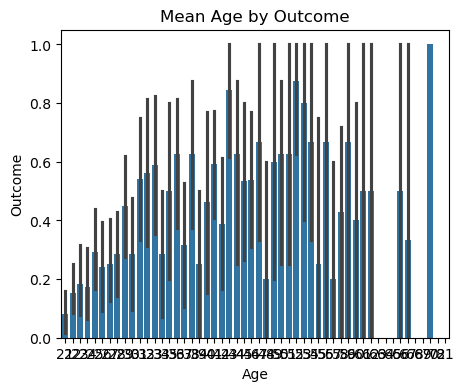

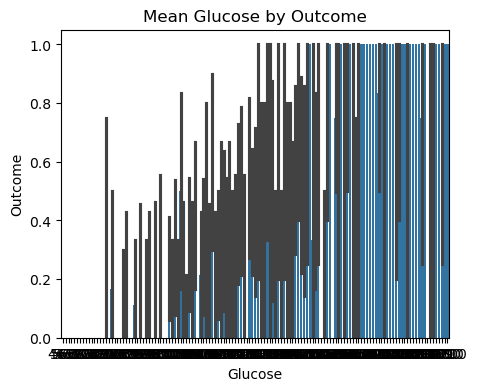

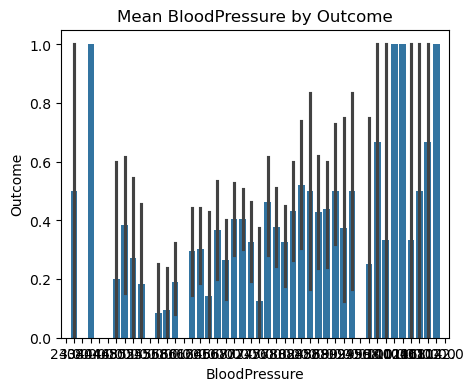

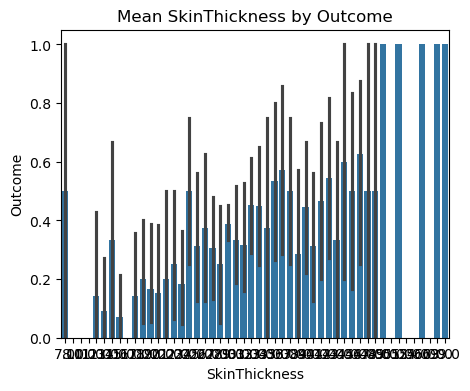

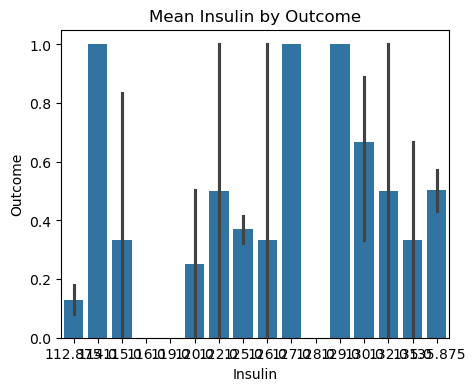

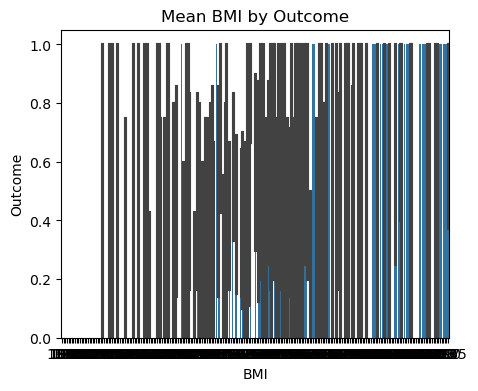

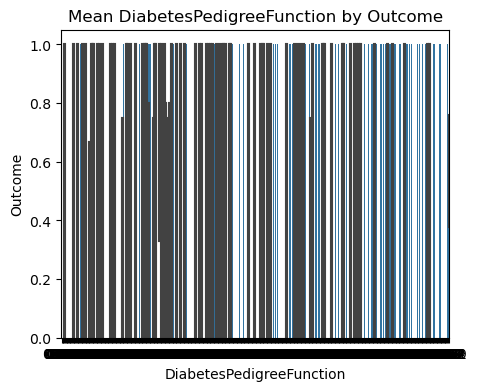

In [36]:
# Barplot – Mean value of feature vs Outcome

import seaborn as sns
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(5,4))
    sns.barplot(x=df[col], y=df["Outcome"], data=df, estimator="mean")
    plt.title(f"Mean {col} by Outcome")
    plt.show()


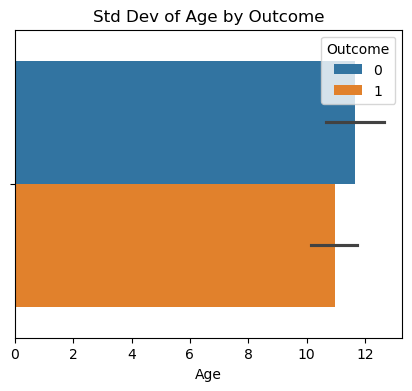

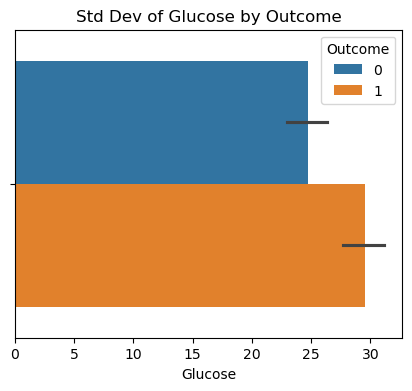

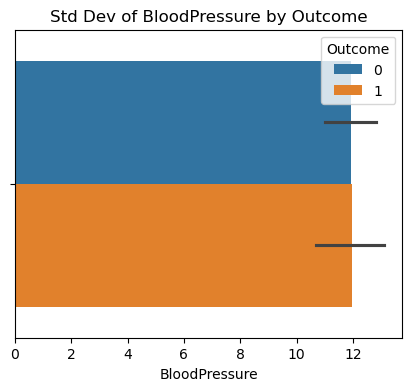

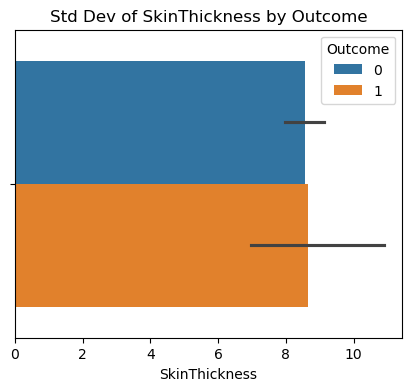

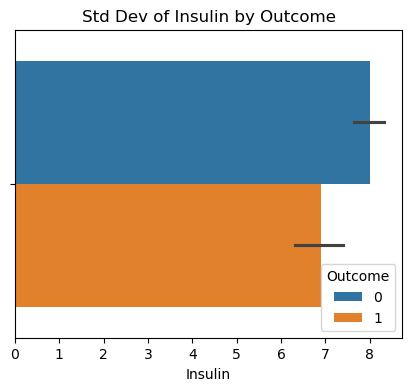

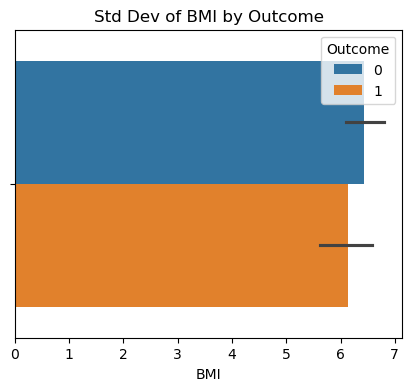

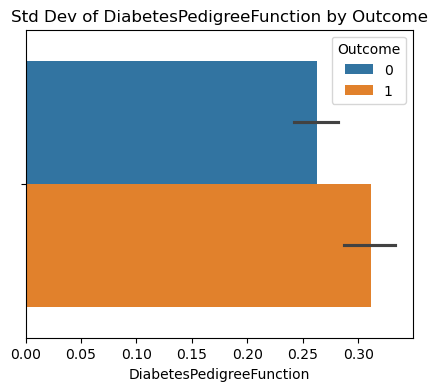

In [35]:
# Barplot – Standard Deviation by Outcome

for col in cols:
    plt.figure(figsize=(5,4))
    sns.barplot(x=df[col], hue=df["Outcome"], data=df, estimator="std")
    plt.title(f"Std Dev of {col} by Outcome")
    plt.show()


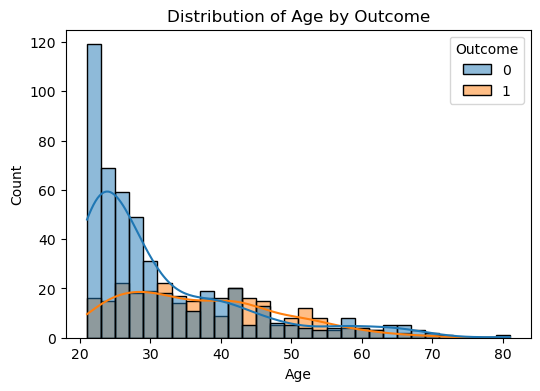

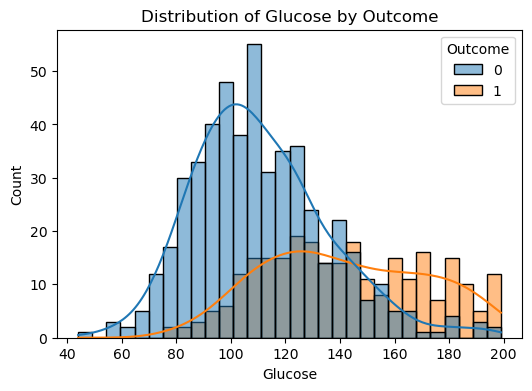

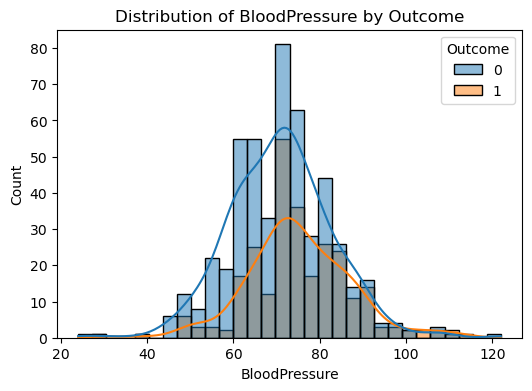

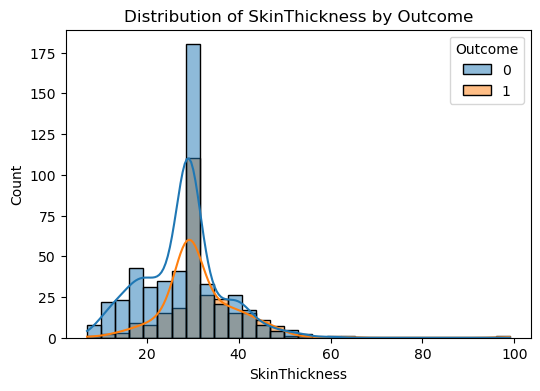

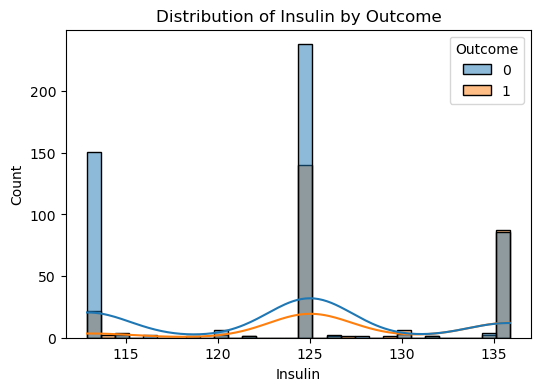

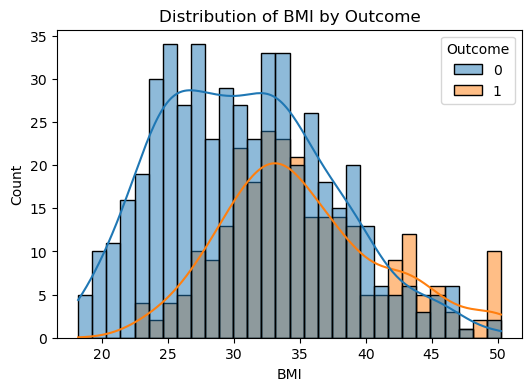

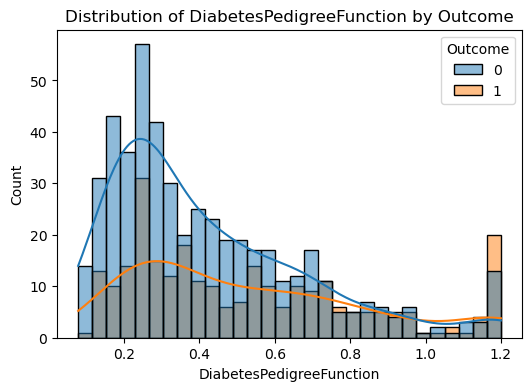

In [32]:
# Histogram + KDE (Distribution comparison)

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, bins=30)
    plt.title(f"Distribution of {col} by Outcome")
    plt.show()


### Min Max Scaler

In [40]:
from sklearn.preprocessing import MinMaxScaler

exclude_cols = ["Outcome"]
scale_cols = [col for col in df.columns if col not in exclude_cols]
scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.527174,0.480499,0.489305,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.527174,0.262090,0.243316,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.527174,0.159126,0.529412,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.000000,0.308892,0.079323,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,1.000000,0.776911,1.000000,0.200000,1


In [41]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.3,random_state=42,stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)
print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")

y_pred_test=lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")

Accuracy: 0.7858472998137802
Accuracy: 0.7489177489177489


In [50]:
confusion_matrix(y_train,y_pred_train)

array([[311,  39],
       [ 76, 111]])

In [51]:
confusion_matrix(y_test,y_pred_test)

array([[130,  20],
       [ 38,  43]])

In [52]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       350
           1       0.74      0.59      0.66       187

    accuracy                           0.79       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537



In [53]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



In [54]:
y_pred_prob=lr.predict_proba(X_test)

y_pred_prob

array([[0.81798638, 0.18201362],
       [0.75495978, 0.24504022],
       [0.24034761, 0.75965239],
       [0.41869975, 0.58130025],
       [0.50114361, 0.49885639],
       [0.93195733, 0.06804267],
       [0.3922299 , 0.6077701 ],
       [0.8487189 , 0.1512811 ],
       [0.95299252, 0.04700748],
       [0.62479238, 0.37520762],
       [0.94260888, 0.05739112],
       [0.8834078 , 0.1165922 ],
       [0.93411815, 0.06588185],
       [0.5310733 , 0.4689267 ],
       [0.21537721, 0.78462279],
       [0.14198501, 0.85801499],
       [0.59210937, 0.40789063],
       [0.50490334, 0.49509666],
       [0.18260058, 0.81739942],
       [0.74810032, 0.25189968],
       [0.59518095, 0.40481905],
       [0.76811041, 0.23188959],
       [0.90336485, 0.09663515],
       [0.94879417, 0.05120583],
       [0.2311826 , 0.7688174 ],
       [0.66511124, 0.33488876],
       [0.6861726 , 0.3138274 ],
       [0.59333641, 0.40666359],
       [0.92426847, 0.07573153],
       [0.83960415, 0.16039585],
       [0.